In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df=pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/train.csv')


In [4]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
test_df=pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/test.csv')
test_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
print(train_df.shape)
print(test_df.shape)

(595212, 59)
(892816, 58)


In [7]:
train_df['train']=1
test_df['train']=0
y_train=train_df['target']
train_df.drop(columns=['id','target'],inplace=True)
test_df.drop(columns=['id'],inplace=True)
combined_df=pd.concat((train_df,test_df)).reset_index(drop=True)


In [8]:
combined_df.head(20)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,train
0,2,2,5,1,0,0,1,0,0,0,...,1,5,8,0,1,1,0,0,1,1
1,1,1,7,0,0,0,0,1,0,0,...,1,1,9,0,1,1,0,1,0,1
2,5,4,9,1,0,0,0,1,0,0,...,2,7,7,0,1,1,0,1,0,1
3,0,1,2,0,0,1,0,0,0,0,...,2,4,9,0,0,0,0,0,0,1
4,0,2,0,1,0,1,0,0,0,0,...,1,1,3,0,0,0,1,1,0,1
5,5,1,4,0,0,0,0,0,1,0,...,2,0,9,0,1,0,1,1,1,1
6,2,1,3,1,0,0,1,0,0,0,...,0,0,10,0,1,0,0,1,0,1
7,5,1,4,0,0,1,0,0,0,0,...,1,3,6,1,0,1,0,1,0,1
8,5,1,3,1,0,0,0,1,0,0,...,2,1,5,0,1,0,0,0,1,1
9,1,1,2,0,0,0,1,0,0,0,...,5,0,6,0,1,0,0,1,0,1


In [9]:
combined_df.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'train'],
      d

In [10]:
combined_df=combined_df.replace(-1,np.nan)

In [11]:
x=combined_df.isnull().sum()


In [12]:
y=x[x>0]
y.sort_values(ascending=False)

ps_car_03_cat    1028142
ps_car_05_cat     666910
ps_reg_03         269456
ps_car_14         106425
ps_car_07_cat      28820
ps_ind_05_cat      14519
ps_car_09_cat       1446
ps_ind_02_cat        523
ps_car_01_cat        267
ps_ind_04_cat        228
ps_car_02_cat         10
ps_car_11              6
ps_car_12              1
dtype: int64

In [13]:
cat_missing=[col for col in y.index if '_cat' in col]
num_missing=[col for col in y.index if '_cat' not in col]

skewed_feats = combined_df[num_missing].skew()

In [14]:

for col in num_missing:
 
    if abs(skewed_feats[col]) > 0.75:
        
        median_val = combined_df[col].median()
        combined_df[col].fillna(median_val, inplace=True)
    else:
        mean_val = combined_df[col].mean()
        combined_df[col].fillna(mean_val, inplace=True)

for col in cat_missing:
    mode_val = combined_df[col].mode()[0]
    combined_df[col].fillna(mode_val, inplace=True)
    print(f"Filled categorical column '{col}' with mode: {mode_val}")

Filled categorical column 'ps_ind_02_cat' with mode: 1.0
Filled categorical column 'ps_ind_04_cat' with mode: 0.0
Filled categorical column 'ps_ind_05_cat' with mode: 0.0
Filled categorical column 'ps_car_01_cat' with mode: 11.0
Filled categorical column 'ps_car_02_cat' with mode: 1.0
Filled categorical column 'ps_car_03_cat' with mode: 1.0
Filled categorical column 'ps_car_05_cat' with mode: 1.0
Filled categorical column 'ps_car_07_cat' with mode: 1.0
Filled categorical column 'ps_car_09_cat' with mode: 2.0


In [15]:
#now encoding

In [16]:
cat_missing

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat']

In [17]:
encoded_df=pd.get_dummies(combined_df,columns=cat_missing,drop_first=True)

In [18]:
encoded_df.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_1.0,ps_car_03_cat_1.0,ps_car_05_cat_1.0,ps_car_07_cat_1.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0
0,2,5,0,1,0,0,0,0,0,0,...,True,False,True,True,True,True,False,False,False,False
1,1,7,0,0,1,0,0,0,0,0,...,False,True,True,True,True,True,False,True,False,False
2,5,9,0,0,1,0,0,0,0,0,...,False,False,True,True,True,True,False,True,False,False
3,0,2,1,0,0,0,0,0,0,0,...,False,False,True,False,True,True,False,False,True,False
4,0,0,1,0,0,0,0,0,0,0,...,False,True,True,True,True,True,False,True,False,False


In [19]:

train_df=encoded_df[encoded_df['train']==1]
test_df=encoded_df[encoded_df['train']==0]
train_df.drop(columns=['train'],inplace=True)
test_df.drop(columns=['train'],inplace=True)

<Axes: xlabel='target', ylabel='Count'>

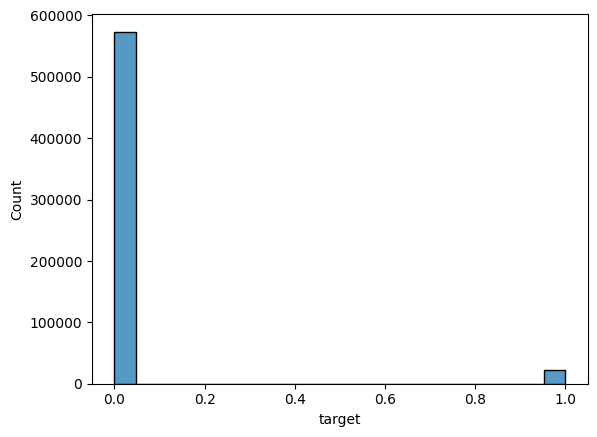

In [20]:
sns.histplot(y_train)

In [21]:
#modeling

In [22]:
import lightgbm as lgb

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)
oof_preds = np.zeros(train_df.shape[0])
sub_preds = np.zeros(test_df.shape[0])

# LightGBM parameters
lgbm_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'n_estimators': 2000,
    'learning_rate': 0.01,
    'num_leaves': 20,
    'max_depth': 5,
    'seed': 42,
    'n_jobs': -1,
    'verbose': -1,
    'colsample_bytree': 0.7,
    'subsample': 0.7,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
}

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import numpy as np
import pandas as pd

NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)
oof_preds = np.zeros(train_df.shape[0])
sub_preds = np.zeros(test_df.shape[0])

lgbm_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'n_estimators': 2000,
    'learning_rate': 0.01,
    'num_leaves': 20,
    'max_depth': 5,
    'seed': 42,
    'n_jobs': -1,
    'verbose': -1,
    'colsample_bytree': 0.7,
    'subsample': 0.7,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
}

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df, y_train)):
    X_train, y_train_fold = train_df.iloc[train_idx], y_train.iloc[train_idx]
    X_valid, y_valid_fold = train_df.iloc[valid_idx], y_train.iloc[valid_idx]

    model = lgb.LGBMClassifier(**lgbm_params)
    
    callbacks = [lgb.early_stopping(100, verbose=False)]
    
    model.fit(X_train, y_train_fold, 
              eval_set=[(X_valid, y_valid_fold)],
              eval_metric='auc',
              callbacks=callbacks)

    oof_preds[valid_idx] = model.predict_proba(X_valid)[:, 1]
    sub_preds += model.predict_proba(test_df)[:, 1] / folds.n_splits
    
    fold_auc = roc_auc_score(y_valid_fold, oof_preds[valid_idx])
    print(f"Fold {n_fold+1} AUC: {fold_auc}")

overall_oof_auc = roc_auc_score(y_train, oof_preds)
gini_score = 2 * overall_oof_auc - 1

print(f"\\nOverall OOF AUC: {overall_oof_auc}")
print(f"Final Gini Score: {gini_score}")



Fold 1 AUC: 0.6427102981355123
Fold 2 AUC: 0.6403513239492294
Fold 3 AUC: 0.6422828492553584
Fold 4 AUC: 0.6415350969936955
Fold 5 AUC: 0.6332644872676444
\nOverall OOF AUC: 0.6399430640891726
Final Gini Score: 0.27988612817834513


In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)
oof_preds_xgb = np.zeros(train_df.shape[0])
sub_preds_xgb = np.zeros(test_df.shape[0])

# XGBoost parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.02, # This is the learning_rate
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'seed': 42,
    'n_jobs': -1,
    'tree_method': 'hist'}
print("Starting XGBoost model training...")

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df, y_train)):
    X_train, y_train_fold = train_df.iloc[train_idx], y_train.iloc[train_idx]
    X_valid, y_valid_fold = train_df.iloc[valid_idx], y_train.iloc[valid_idx]
    
    
    
    model = xgb.XGBClassifier(**xgb_params, n_estimators=2000)
    
    model.fit(X_train, y_train_fold, 
              eval_set=[(X_valid, y_valid_fold)],
              early_stopping_rounds=100,
              verbose=False)

    oof_preds_xgb[valid_idx] = model.predict_proba(X_valid)[:, 1]
    sub_preds_xgb += model.predict_proba(test_df)[:, 1] / folds.n_splits
    
    fold_auc = roc_auc_score(y_valid_fold, oof_preds_xgb[valid_idx])
    

overall_oof_auc_xgb = roc_auc_score(y_train, oof_preds_xgb)
gini_score_xgb = 2 * overall_oof_auc_xgb - 1

print(f"\nOverall OOF AUC (XGBoost): {overall_oof_auc_xgb}")
print(f"Final Gini Score (XGBoost): {gini_score_xgb}")


Starting XGBoost model training...


In [ ]:

ensemble_preds = 0.5 * sub_preds + 0.5 * sub_preds_xgb



original_test_df = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/test.csv')

submission_ensemble = pd.DataFrame({
    'id': original_test_df['id'], 
    'target': ensemble_preds 
})


submission_ensemble.to_csv('submission_ensemble.csv', index=False)

print("\nFinal blended submission file 'submission_ensemble.csv' has been created.")
submission_ensemble.head()